# Import

In [1]:
from PIL import Image
import pandas as pd

from script.tool import *

# Initial

In [2]:
n_cv = 5 
path_dataset = '/app/nfs_clientshare/Datasets/Cosmenet_products_15000/raw_data'
device = torch.device("cuda:0")

In [3]:
df = scan_directory(path_dataset)
df_pd, index_less_than_n, index_greater_than_or_equal_to_n = filter_data(df, minimum_data_class=n_cv)
img_path_greater = df_pd['path_img'][index_greater_than_or_equal_to_n]
img_path_less = df_pd['path_img'][index_less_than_n]

amount of all image : 15524
amount of image that less than 5 in that class : 116
amount of image that more than 5 in that class : 15408


In [4]:
list_data = [10,20,30,40,50]

# Vit

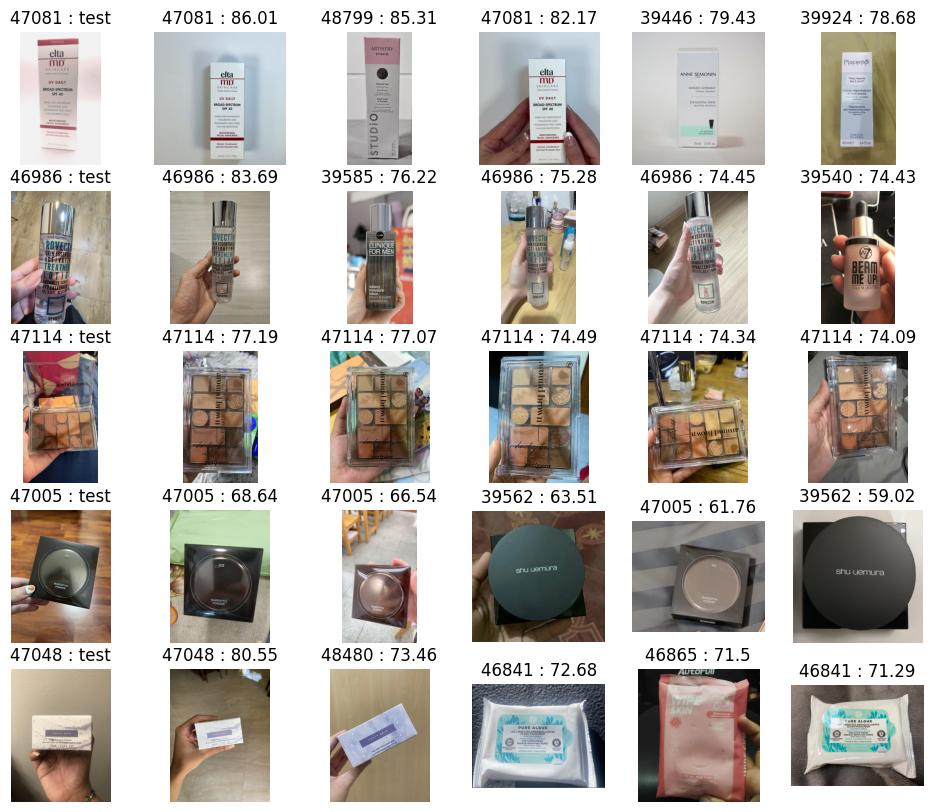

scores 5 fold : [0.6314081765087606, 0.6314081765087606, 0.6262167423750811, 0.6205777345017851, 0.6254462836741318]
average score : 0.6270114227137038


In [5]:
x_gg_onnx, y_gg_onnx = load_feature("vit_b_p16_224_last_hidden_onnx_.csv")
y_gg_onnx_label_encode, _ = pd.factorize(y_gg_onnx)
result_gg_onnx, ls_gg_onnx, res_t_gg_onnx = StratifiedKFold_score(x_gg_onnx, 
                                                      y_gg_onnx_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_onnx, res_t_gg_onnx, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_onnx}")
print(f"average score : {sum(result_gg_onnx)/n_cv}")

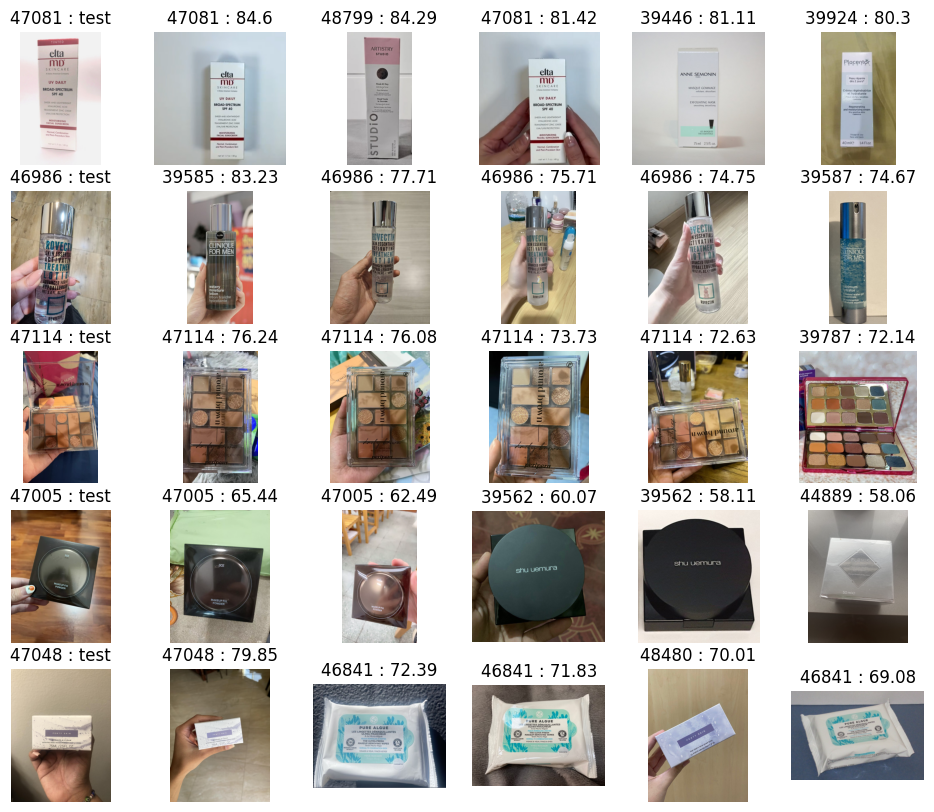

scores 5 fold : [0.627514600908501, 0.6288124594419209, 0.618429591174562, 0.6092177864329763, 0.6199285946121389]
average score : 0.6207806065140198


In [5]:
x_gg_onnx_quantized, y_gg_onnx_quantized = load_feature("vit_b_p16_224_last_hidden_onnx_quantized.csv")
y_gg_onnx_quantized_label_encode, _ = pd.factorize(y_gg_onnx_quantized)
result_gg_onnx_quantized, ls_gg_onnx_quantized, res_t_gg_onnx_quantized = StratifiedKFold_score(x_gg_onnx_quantized, 
                                                      y_gg_onnx_quantized_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_onnx_quantized, res_t_gg_onnx_quantized, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_onnx_quantized}")
print(f"average score : {sum(result_gg_onnx_quantized)/n_cv}")

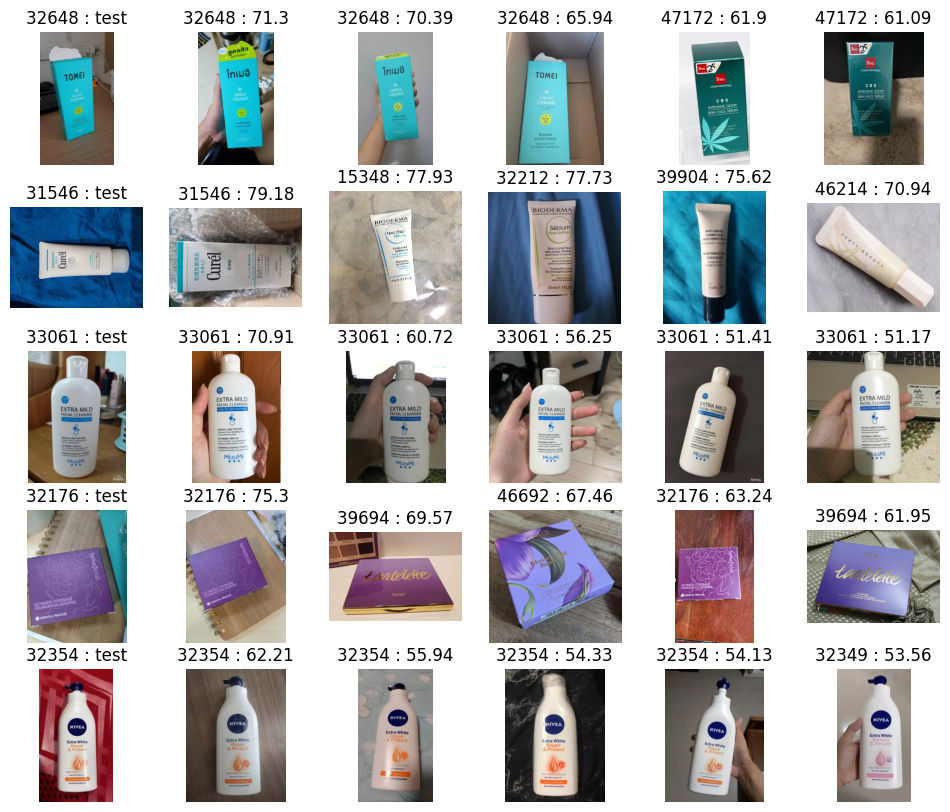

scores 5 fold : [0.7180402336145361, 0.7105775470473719, 0.7212848799480857, 0.7247646867900033, 0.7078870496592016]
average score : 0.7165108794118398


In [7]:
x_gg_last_hidden_trained, y_gg_last_hidden_trained = load_feature("vit_b_p16_224_last_hidden_trained_lr2e_05.csv")
y_gg_last_hidden_trained_label_encode, _ = pd.factorize(y_gg_last_hidden_trained)
result_gg_last_hidden_trained, ls_gg_last_hidden_trained, res_t_gg_last_hidden_trained = StratifiedKFold_score(x_gg_last_hidden_trained, 
                                                                                             y_gg_last_hidden_trained_label_encode, 
                                                                                             n_cv=n_cv, 
                                                                                             index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_last_hidden_trained, res_t_gg_last_hidden_trained, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_last_hidden_trained}")
print(f"average score : {sum(result_gg_last_hidden_trained)/n_cv}")

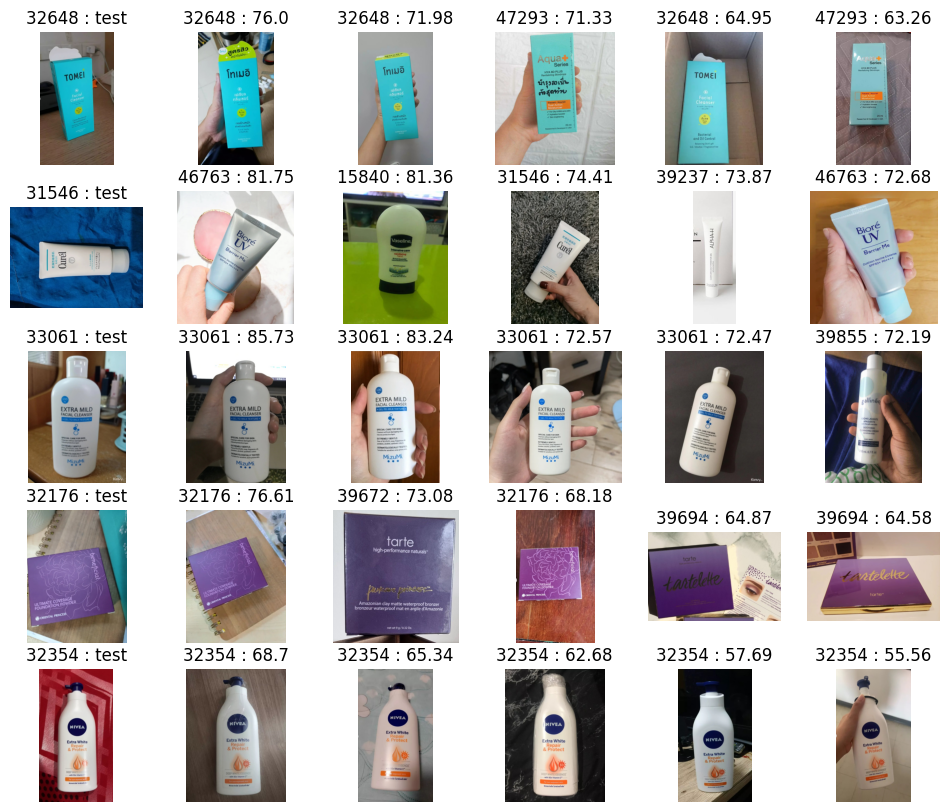

scores 5 fold : [0.6907852044127191, 0.6959766385463985, 0.6953277092796886, 0.7098344693281402, 0.6871145731905226]
average score : 0.6958077189514938


In [5]:
x_gg_last_hidden_trained_cos, y_gg_last_hidden_trained_cos = load_feature("vit_b_p16_224_last_hidden_trained_lr2e_05_cos.csv")
y_gg_last_hidden_trained_label_encode_cos, _ = pd.factorize(y_gg_last_hidden_trained_cos)
result_gg_last_hidden_trained_cos, ls_gg_last_hidden_trained_cos, res_t_gg_last_hidden_trained_cos = StratifiedKFold_score(x_gg_last_hidden_trained_cos, 
                                                                                             y_gg_last_hidden_trained_label_encode_cos, 
                                                                                             n_cv=n_cv, 
                                                                                             index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_last_hidden_trained_cos, res_t_gg_last_hidden_trained_cos, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_last_hidden_trained_cos}")
print(f"average score : {sum(result_gg_last_hidden_trained_cos)/n_cv}")

# Efficientnet

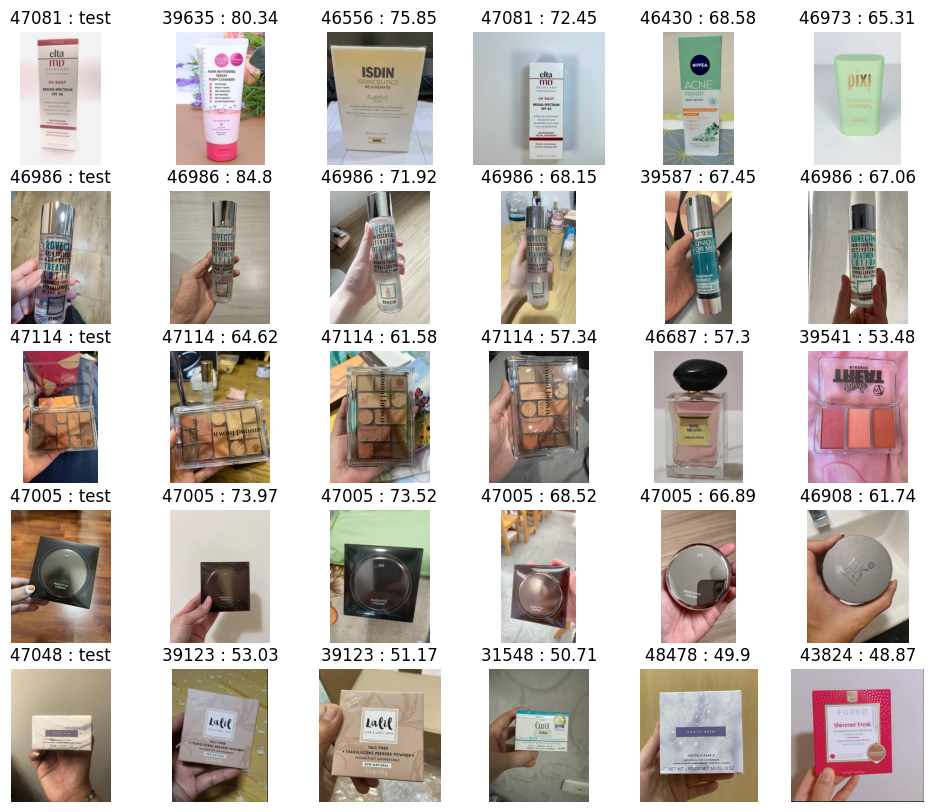

scores 5 fold : [0.6992212848799481, 0.7086307592472421, 0.7034393251135627, 0.6864654333008764, 0.7069133398247323]
average score : 0.7009340284732722


In [5]:
x_eff_b1, y_eff_b1 = load_feature("efficientnet_b1.csv")
y_eff_b1_label_encode, _ = pd.factorize(y_eff_b1)
result_eff_b1, ls_eff_b1, res_t_eff_b1 = StratifiedKFold_score(x_eff_b1, 
                                                      y_eff_b1_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_eff_b1, res_t_eff_b1, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_eff_b1}")
print(f"average score : {sum(result_eff_b1)/n_cv}")

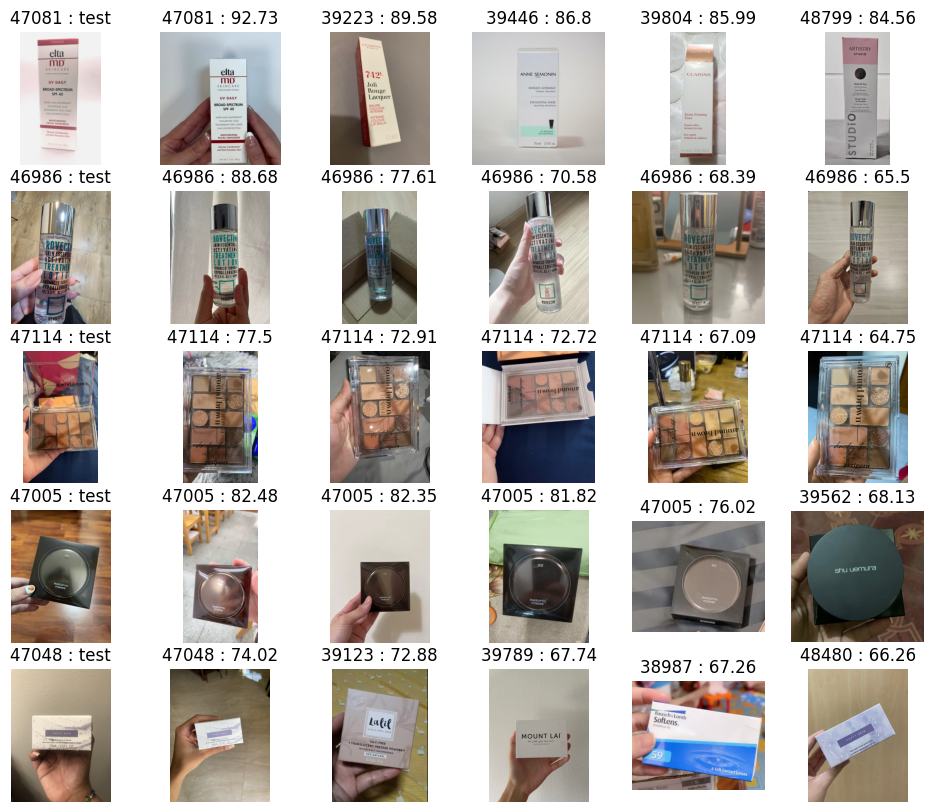

scores 5 fold : [0.8001297858533419, 0.8066190785204412, 0.8049967553536664, 0.7880558260305096, 0.80688088283025]
average score : 0.8013364657176419


In [6]:
x_eff_b5, y_eff_b5 = load_feature("efficientnet_b5.csv")
y_eff_b5_label_encode, _ = pd.factorize(y_eff_b5)
result_eff_b5, ls_eff_b5, res_t_eff_b5 = StratifiedKFold_score(x_eff_b5, 
                                                      y_eff_b5_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_eff_b5, res_t_eff_b5, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_eff_b5}")
print(f"average score : {sum(result_eff_b5)/n_cv}")